In [2]:
%matplotlib inline
import skbio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [3]:
dm = skbio.DistanceMatrix.read('ag-cleaned-multiple-timepoints_even1250_unweighted.txt')
w_dm = skbio.DistanceMatrix.read('ag-cleaned-multiple-timepoints_even1250_weighted.txt')
deltas = pd.read_csv('ag-cleaned-multiple-timepoints-deltas.txt', sep='\t', dtype=str)

In [4]:
absdeltas = deltas

In [5]:
deltas['DeltaInDays'] = pd.to_numeric(deltas['DeltaInDays'])
absdeltas['DeltaInDays'] = deltas['DeltaInDays'].abs()

In [6]:
unique_ids = []
unique_sampleA = []
unique_sampleB = []

for i in deltas['HOST_SUBJECT_ID']:
    if i not in unique_ids:
        unique_ids.append(i)
        
for i in deltas['SampleID-A']:
    if i not in unique_sampleA:
        unique_sampleA.append(i)
        
for i in deltas['SampleID-B']:
    if i not in unique_sampleB:
        unique_sampleB.append(i)

print(len(unique_ids))
print(len(unique_sampleA))
print(len(unique_sampleB))


565
1553
1553


In [7]:
bin_1mo = []
bin_2mo = []
bin_3mo = []
bin_4mo = []
bin_5mo = []
bin_6mo = []
bin_7mo = []
bin_8mo = []

host_1mo = {}
host_2mo = {}
host_3mo = {}
host_4mo = {}
host_5mo = {}
host_6mo = {}

In [8]:
for dl in range(len(absdeltas)):
    
    if (absdeltas['DeltaInDays'][dl]/30.0) <= 1:
        if (absdeltas['HOST_SUBJECT_ID'][dl] not in host_1mo):
            host_1mo.update({absdeltas['HOST_SUBJECT_ID'][dl]:absdeltas['HOST_SUBJECT_ID'][dl]})
            if absdeltas['SampleID-A'][dl] not in bin_1mo:
                bin_1mo.append(absdeltas['SampleID-A'][dl])
            if absdeltas['SampleID-B'][dl] not in bin_1mo:
                bin_1mo.append(absdeltas['SampleID-B'][dl])  
                
    elif absdeltas['DeltaInDays'][dl]/30.0 <= 2:
        if (absdeltas['HOST_SUBJECT_ID'][dl] not in host_2mo):
            host_2mo.update({absdeltas['HOST_SUBJECT_ID'][dl]:absdeltas['HOST_SUBJECT_ID'][dl]})
            if absdeltas['SampleID-A'][dl] not in bin_2mo:
                bin_2mo.append(absdeltas['SampleID-A'][dl])
            if absdeltas['SampleID-B'][dl] not in bin_2mo:
                bin_2mo.append(absdeltas['SampleID-B'][dl])   
                
    elif (absdeltas['DeltaInDays'][dl]/30.0) <= 3:
        if (absdeltas['HOST_SUBJECT_ID'][dl] not in host_3mo):
            host_3mo.update({absdeltas['HOST_SUBJECT_ID'][dl]:absdeltas['HOST_SUBJECT_ID'][dl]})
            if absdeltas['SampleID-A'][dl] not in bin_3mo:
                bin_3mo.append(absdeltas['SampleID-A'][dl])
            if absdeltas['SampleID-B'][dl] not in bin_3mo:
                bin_3mo.append(absdeltas['SampleID-B'][dl])
            
    elif (absdeltas['DeltaInDays'][dl]/30.0) <= 4:
        if (absdeltas['HOST_SUBJECT_ID'][dl] not in host_4mo):
            host_4mo.update({absdeltas['HOST_SUBJECT_ID'][dl]:absdeltas['HOST_SUBJECT_ID'][dl]})
            if absdeltas['SampleID-A'][dl] not in bin_4mo:
                bin_4mo.append(absdeltas['SampleID-A'][dl])
            if absdeltas['SampleID-B'][dl] not in bin_4mo:    
                bin_4mo.append(absdeltas['SampleID-B'][dl])            
            
    elif (absdeltas['DeltaInDays'][dl]/30.0) <= 5:
        if (absdeltas['HOST_SUBJECT_ID'][dl] not in host_5mo):
            host_5mo.update({absdeltas['HOST_SUBJECT_ID'][dl]:absdeltas['HOST_SUBJECT_ID'][dl]})
            if absdeltas['SampleID-A'][dl] not in bin_5mo:
                bin_5mo.append(absdeltas['SampleID-A'][dl])
            if absdeltas['SampleID-B'][dl] not in bin_5mo:
                bin_5mo.append(absdeltas['SampleID-B'][dl])
            
    elif (absdeltas['DeltaInDays'][dl]/30.0) <= 6:
        if (absdeltas['HOST_SUBJECT_ID'][dl] not in host_6mo):
            host_6mo.update({absdeltas['HOST_SUBJECT_ID'][dl]:absdeltas['HOST_SUBJECT_ID'][dl]})
            if absdeltas['SampleID-A'][dl] not in bin_6mo:
                bin_6mo.append(absdeltas['SampleID-A'][dl])
            if absdeltas['SampleID-B'][dl] not in bin_6mo:
                bin_6mo.append(absdeltas['SampleID-B'][dl])

In [10]:
sub_dm1 = dm.filter(bin_1mo)
sub_dm2 = dm.filter(bin_2mo)
sub_dm3 = dm.filter(bin_3mo)
sub_dm4 = dm.filter(bin_4mo)
sub_dm5 = dm.filter(bin_5mo)
sub_dm6 = dm.filter(bin_6mo)

In [11]:
#cols = ['1 month', '2 months', '3 months', '4 months']
sub_dms = {'1mo':sub_dm1.condensed_form(), '2mo':sub_dm2.condensed_form(), '3mo':sub_dm3.condensed_form(), 
           '4mo':sub_dm4.condensed_form()}
list_dms = [sub_dm1.condensed_form(), sub_dm2.condensed_form(), sub_dm3.condensed_form(), sub_dm4.condensed_form(),
            sub_dm5.condensed_form(), sub_dm6.condensed_form()]
df1 = pd.DataFrame({'1mo':sub_dm1.condensed_form()})
df2 = pd.DataFrame({'2mo':sub_dm2.condensed_form()})
df3 = pd.DataFrame({'3mo':sub_dm3.condensed_form()})
dfs = pd.concat([df1, df2, df3], ignore_index=True, axis=1)
cols = ['1mo', '2mo', '3mo', '4mo', '5mo', '6mo']

In [12]:
#cols = ['1 month', '2 months', '3 months', '4 months']
sub_dms = {'1mo':sub_dm1.condensed_form(), '2mo':sub_dm2.condensed_form(), '3mo':sub_dm3.condensed_form(), 
           '4mo':sub_dm4.condensed_form()}
list_dms = [sub_dm1.condensed_form(), sub_dm2.condensed_form(), sub_dm3.condensed_form(), sub_dm4.condensed_form(),
            sub_dm5.condensed_form(), sub_dm6.condensed_form()]

df1 = pd.DataFrame({'1mo':sub_dm1.condensed_form()})
df2 = pd.DataFrame({'2mo':sub_dm2.condensed_form()})
df3 = pd.DataFrame({'3mo':sub_dm3.condensed_form()})
df4 = pd.DataFrame({'4mo':sub_dm4.condensed_form()})
df5 = pd.DataFrame({'5mo':sub_dm5.condensed_form()})
df6 = pd.DataFrame({'6mo':sub_dm6.condensed_form()})
dm_dataframe = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True, axis=1)
cols = ['1mo', '2mo', '3mo', '4mo', '5mo', '6mo']
dm_dataframe.columns = cols

In [13]:
distance = []
for dl in range(len(absdeltas)):
    distance.append(dm[absdeltas['SampleID-A'][dl], absdeltas['SampleID-B'][dl]])

absdeltas['Distance'] = distance

In [14]:
delmonths = []
for dl in range(len(absdeltas)):
    if absdeltas['DeltaInDays'][dl]/30 <= 1:
        delmonths.append(1)
    elif absdeltas['DeltaInDays'][dl]/30 <= 2:
        delmonths.append(2)
    elif absdeltas['DeltaInDays'][dl]/30 <= 3:
        delmonths.append(3)
    elif absdeltas['DeltaInDays'][dl]/30 <= 4:
        delmonths.append(4)
    elif absdeltas['DeltaInDays'][dl]/30 <= 5:
        delmonths.append(5)
    elif absdeltas['DeltaInDays'][dl]/30 <= 6:
        delmonths.append(6)
    elif absdeltas['DeltaInDays'][dl]/30 <= 7:
        delmonths.append(7)
    elif absdeltas['DeltaInDays'][dl]/30 <= 8:
        delmonths.append(8)
    elif absdeltas['DeltaInDays'][dl]/30 <= 9:
        delmonths.append(9)
    elif absdeltas['DeltaInDays'][dl]/30 <= 10:
        delmonths.append(10)
    elif absdeltas['DeltaInDays'][dl]/30 <= 11:
        delmonths.append(11)
    elif absdeltas['DeltaInDays'][dl]/30 <= 12:
        delmonths.append(12)
    elif absdeltas['DeltaInDays'][dl]/30 > 12:
        delmonths.append(13)

absdeltas['DeltaInMonths'] = delmonths

In [18]:
uni_sub_del = pd.DataFrame()

In [19]:
host_1mo = {}
host_2mo = {}
host_3mo = {}
host_4mo = {}
host_5mo = {}
host_6mo = {}
host_7mo = {}
host_8mo = {}
host_9mo = {}
host_10mo = {}
host_11mo = {}
host_12mo = {}
host_13mo = {}
#these loops are pretty hacky
for dl in range(len(absdeltas)):
    
    if absdeltas['DeltaInMonths'][dl] == 1:
        if (absdeltas['HOST_SUBJECT_ID'][dl] not in host_1mo):
            host_1mo.update({absdeltas['HOST_SUBJECT_ID'][dl]:absdeltas['HOST_SUBJECT_ID'][dl]})
            uni_sub_del = uni_sub_del.append(absdeltas.loc[dl], ignore_index=True)
 
                
    elif absdeltas['DeltaInMonths'][dl] == 2:
        if (absdeltas['HOST_SUBJECT_ID'][dl] not in host_2mo):
            host_2mo.update({absdeltas['HOST_SUBJECT_ID'][dl]:absdeltas['HOST_SUBJECT_ID'][dl]})
            uni_sub_del = uni_sub_del.append(absdeltas.loc[dl], ignore_index=True)
   
                
    elif absdeltas['DeltaInMonths'][dl] == 3:
        if (absdeltas['HOST_SUBJECT_ID'][dl] not in host_3mo):
            host_3mo.update({absdeltas['HOST_SUBJECT_ID'][dl]:absdeltas['HOST_SUBJECT_ID'][dl]})
            uni_sub_del = uni_sub_del.append(absdeltas.loc[dl], ignore_index=True)

            
    elif absdeltas['DeltaInMonths'][dl] == 4:
        if (absdeltas['HOST_SUBJECT_ID'][dl] not in host_4mo):
            host_4mo.update({absdeltas['HOST_SUBJECT_ID'][dl]:absdeltas['HOST_SUBJECT_ID'][dl]})
            uni_sub_del = uni_sub_del.append(absdeltas.loc[dl], ignore_index=True)
            
    elif absdeltas['DeltaInMonths'][dl] == 5:
        if (absdeltas['HOST_SUBJECT_ID'][dl] not in host_5mo):
            host_5mo.update({absdeltas['HOST_SUBJECT_ID'][dl]:absdeltas['HOST_SUBJECT_ID'][dl]})
            uni_sub_del = uni_sub_del.append(absdeltas.loc[dl], ignore_index=True)

            
    elif absdeltas['DeltaInMonths'][dl] == 6:
        if (absdeltas['HOST_SUBJECT_ID'][dl] not in host_6mo):
            host_6mo.update({absdeltas['HOST_SUBJECT_ID'][dl]:absdeltas['HOST_SUBJECT_ID'][dl]})
            uni_sub_del = uni_sub_del.append(absdeltas.loc[dl], ignore_index=True)
    
    elif absdeltas['DeltaInMonths'][dl] == 7:
        if (absdeltas['HOST_SUBJECT_ID'][dl] not in host_7mo):
            host_7mo.update({absdeltas['HOST_SUBJECT_ID'][dl]:absdeltas['HOST_SUBJECT_ID'][dl]})
            uni_sub_del = uni_sub_del.append(absdeltas.loc[dl], ignore_index=True)

    elif absdeltas['DeltaInMonths'][dl] == 8:
        if (absdeltas['HOST_SUBJECT_ID'][dl] not in host_8mo):
            host_8mo.update({absdeltas['HOST_SUBJECT_ID'][dl]:absdeltas['HOST_SUBJECT_ID'][dl]})
            uni_sub_del = uni_sub_del.append(absdeltas.loc[dl], ignore_index=True)
    
    elif absdeltas['DeltaInMonths'][dl] == 9:
        if (absdeltas['HOST_SUBJECT_ID'][dl] not in host_9mo):
            host_9mo.update({absdeltas['HOST_SUBJECT_ID'][dl]:absdeltas['HOST_SUBJECT_ID'][dl]})
            uni_sub_del = uni_sub_del.append(absdeltas.loc[dl], ignore_index=True)
            
    elif absdeltas['DeltaInMonths'][dl] == 10:
        if (absdeltas['HOST_SUBJECT_ID'][dl] not in host_10mo):
            host_10mo.update({absdeltas['HOST_SUBJECT_ID'][dl]:absdeltas['HOST_SUBJECT_ID'][dl]})
            uni_sub_del = uni_sub_del.append(absdeltas.loc[dl], ignore_index=True)
            
    elif absdeltas['DeltaInMonths'][dl] == 11:
        if (absdeltas['HOST_SUBJECT_ID'][dl] not in host_11mo):
            host_11mo.update({absdeltas['HOST_SUBJECT_ID'][dl]:absdeltas['HOST_SUBJECT_ID'][dl]})
            uni_sub_del = uni_sub_del.append(absdeltas.loc[dl], ignore_index=True)
            
    elif absdeltas['DeltaInMonths'][dl] == 12:
        if (absdeltas['HOST_SUBJECT_ID'][dl] not in host_12mo):
            host_12mo.update({absdeltas['HOST_SUBJECT_ID'][dl]:absdeltas['HOST_SUBJECT_ID'][dl]})
            uni_sub_del = uni_sub_del.append(absdeltas.loc[dl], ignore_index=True)
            
    elif absdeltas['DeltaInMonths'][dl] == 13:
        if (absdeltas['HOST_SUBJECT_ID'][dl] not in host_13mo):
            host_13mo.update({absdeltas['HOST_SUBJECT_ID'][dl]:absdeltas['HOST_SUBJECT_ID'][dl]})
            uni_sub_del = uni_sub_del.append(absdeltas.loc[dl], ignore_index=True)


In [26]:
between_dm = dm

In [27]:
for ser in range(len(absdeltas)):
    ind1 = absdeltas['SampleID-A'][ser]
    ind2 = absdeltas['SampleID-B'][ser]
    bind1 = between_dm.index(ind1)
    bind2 = between_dm.index(ind2)
    between_dm[bind1][bind2] = 0

In [28]:
w_between_dm = w_dm
for ser in range(len(absdeltas)):
    ind1 = absdeltas['SampleID-A'][ser]
    ind2 = absdeltas['SampleID-B'][ser]
    bind1 = w_between_dm.index(ind1)
    bind2 = w_between_dm.index(ind2)
    w_between_dm[bind1][bind2] = 0
    
w_between_cform = w_between_dm.condensed_form()
w_zero_indexes = []
for i in range(len(w_between_cform)):
    if w_between_cform[i] == 0:
        w_zero_indexes.append(i)

w_between_arr = np.delete(w_between_cform, w_zero_indexes)

In [29]:
between_cform = between_dm.condensed_form()

In [31]:
zero_indexes = []
for i in range(len(between_cform)):
    if between_cform[i] == 0:
        zero_indexes.append(i)

In [33]:
between_arr = np.delete(between_cform, zero_indexes)

In [35]:
w_dm = skbio.DistanceMatrix.read('ag-cleaned-multiple-timepoints_even1250_weighted.txt')

In [36]:
w_distance = []
for dl in range(len(absdeltas)):
    w_distance.append(w_dm[absdeltas['SampleID-A'][dl], absdeltas['SampleID-B'][dl]])

absdeltas['Weighted Distance'] = w_distance

In [39]:
w_distance = []
for dl in range(len(uni_sub_del)):
    w_distance.append(w_dm[uni_sub_del['SampleID-A'][dl], uni_sub_del['SampleID-B'][dl]])

uni_sub_del['Weighted Distance'] = w_distance

In [42]:
bet_delmonths = []
for i in range(len(between_arr)):
    bet_delmonths.append(14)

In [43]:
w_bet_delmonths = []
for i in range(len(w_between_arr)):
    w_bet_delmonths.append(14)

In [44]:
bet_cols = ['Distance']
between_df = pd.DataFrame(data=between_arr, columns=bet_cols)

In [45]:
between_df["DeltaInMonths"] = bet_delmonths

In [46]:
w_bet_cols = ['Weighted Distance']

w_between_df = pd.DataFrame(data=w_between_arr, columns=w_bet_cols)
w_between_df["DeltaInMonths"] = w_bet_delmonths
tot_between_df = pd.concat([between_df, w_between_df])

In [48]:
with_betweens_absdeltas = absdeltas.append(tot_between_df)

# RESULTS SO FAR
Here are the boxplots with the unweighted distances including the btween sample distances as month 14, and below those are the bowplots of the weighted samples. I did something wrong with the dataframes that include the weighted between sample distances and so i have not plotted those yet, as you can see with month 14 on the plot being empty. As expected, the median for the between sample distances in notably higher than within sample distances. 

## Unweighted Distances for all within sample distances

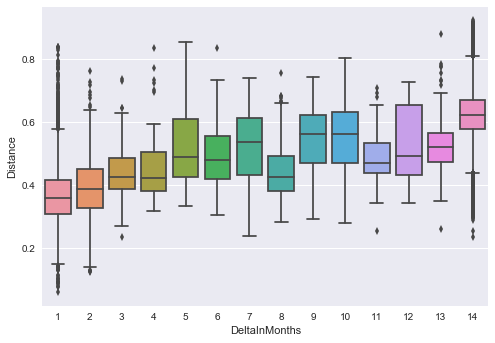

In [50]:
seaborn.boxplot(x="DeltaInMonths", y="Distance", data=with_betweens_absdeltas)

In [51]:
with_betweens_unisubs = uni_sub_del.append(tot_between_df)

## Unweighted Distances for only unique subject distances in each month

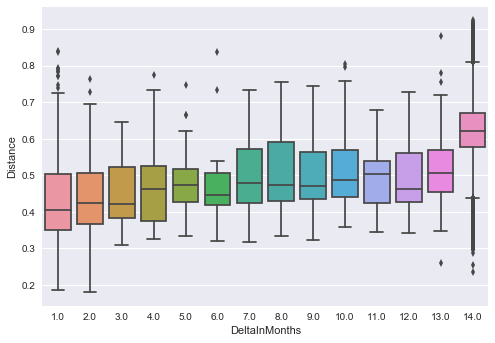

In [52]:
seaborn.boxplot(x="DeltaInMonths", y="Distance", data=with_betweens_unisubs)

## Weighted Distances for all within sample distances

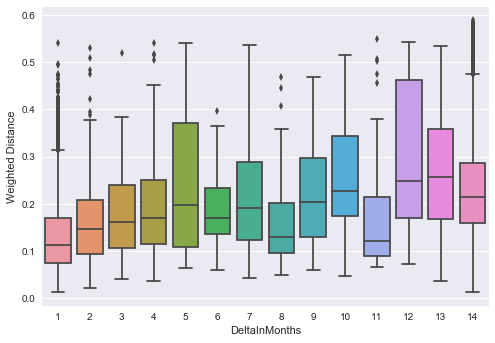

In [54]:
seaborn.boxplot(x="DeltaInMonths", y="Weighted Distance", data=with_betweens_absdeltas)

## Weighted Distances for only unique subject distances in each month

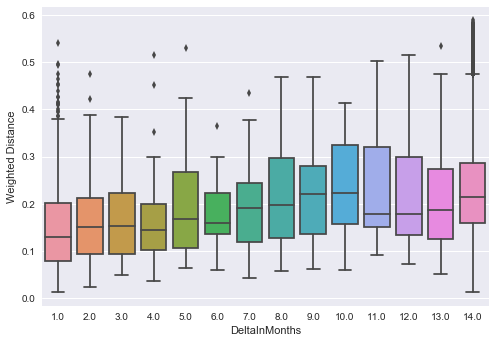

In [55]:
seaborn.boxplot(x="DeltaInMonths", y="Weighted Distance", data=with_betweens_unisubs)